# DSE Course 1, Lab 2: Practice with Pandas and Visualization - Solved

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

In this lab we will continue to practice with pandas,  visualization, and writing functions.

<br>

---

<br>

There are SO many useful features of dataframes, I recommend exploring this resource to try your hand and get familiar with them [ML plus pandas](https://www.machinelearningplus.com/python/101-pandas-exercises-python/) (contains solutions and exercises)




# Before we get started...

I want to share with you another visualization strategy for Session 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

In [ ]:
# create a list of lists. The sublist contains feature 1 v feature 2 and their
# pearsons correlation. Think of this: you would like to loop through df.corr()
# and store those values in a [[feature 1, feature 2, corr],...[...]] list

corrs = []
for i in range(df.corr().shape[0]):
  for j in range(i+1,df.corr().shape[0]):
    corrs.append([df.corr().index[i],df.corr().columns[j],df.corr().iloc[i,j]])

# Now create a new dataframe from this list of lists 
# sort this dataframe by the absolute value of the pearsons correlation.
# you will need to reset the index by these sorted values.

dff = pd.DataFrame(corrs, columns=['Feature 1', 'Feature 2', 'Pearsons'])
dff = dff.reindex(dff.Pearsons.abs().sort_values(ascending=False).index)
dff = dff.reset_index(drop=True)

# turn the rows of the new dataframe into list items for the drop down menu
# i.e. create a nicely formatted list of labels

ls = []
for index in dff.index:
  txt = ''
  for item in dff.iloc[index].values:
    if type(item) != str:
      txt += '{:.3f}'.format(item)
    else:
      txt += str(item) + ', '
  ls.append(txt)

# set this list as the index of the dataframe to appear in the dropdown menu

dff.index = ls

Use this DataFrame to create the dropdown menu for your figure.

In [ ]:
dff.head(10)

,Feature 1,Feature 2,Pearsons
"free sulfur dioxide, total sulfur dioxide, 0.721",free sulfur dioxide,total sulfur dioxide,0.720934
"density, alcohol, -0.687",density,alcohol,-0.686745
"residual sugar, density, 0.552",residual sugar,density,0.552498
"residual sugar, total sulfur dioxide, 0.496",residual sugar,total sulfur dioxide,0.495820
"fixed acidity, density, 0.459",fixed acidity,density,0.459204
"alcohol, quality, 0.444",alcohol,quality,0.444319
"volatile acidity, total sulfur dioxide, -0.415",volatile acidity,total sulfur dioxide,-0.414928
"residual sugar, free sulfur dioxide, 0.403",residual sugar,free sulfur dioxide,0.403439
"chlorides, sulphates, 0.395",chlorides,sulphates,0.395332
"volatile acidity, citric acid, -0.378",volatile acidity,citric acid,-0.378061


In [ ]:
# Code block for breakout

### YOUR CODE ###

def my_plot():
  # instead of x and y fields (like exercise 5), parameterize with a x vs y 
  # field, sorted by abs(pearsons) from the provided DataFrame, dff.
  
  # set the values x, and y based on the dropdown selection

  # x =
  # y =
  
  corr = df.corr()
  pearson = corr[x][y]
  fig, ax = plt.subplots(1,1,figsize=(7,7))
  ax.plot(df[x], df[y], ls='', marker='.')
  ax.set_title('{} vs {} ({:.2f} corr)'.format(x, y, pearson))
  ax.set_xlabel('{}'.format(x))
  ax.set_ylabel('{}'.format(y))

In [ ]:
from ipywidgets import SelectMultiple

You can read more on ipywidgets widget options [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [ ]:
wine_types = SelectMultiple(
    options=['red', 'white'],
    value=['red', 'white']
)

In [ ]:
def my_plot(row=dff.index, types=wine_types):
  # instead of x and y fields, parameterize with a x vs y field.
  # fill the field with the top 10 highest magniuted pearson correlations
  # and sort them
  x = dff.loc[row]['Feature 1']
  y = dff.loc[row]['Feature 2']
  corr = df.corr()
  pearson = corr[x][y]
  fig, ax = plt.subplots(1,1,figsize=(7,7))
  ax.set_title('{} vs {} ({:.2f} corr)'.format(x, y, pearson))
  ax.set_xlabel('{}'.format(x))
  ax.set_ylabel('{}'.format(y))
  ax.set_xlim(min(df[x]), max(df[x]))
  ax.set_ylim(min(df[y]), max(df[y]))
  wht = df.loc[df['type'] == 'white']
  red = df.loc[df['type'] == 'red']
  if 'red' in types:
    ax.plot(red[x], red[y], ls='', marker='.', c='tab:red', alpha=.5)
  if 'white' in types:
    ax.plot(wht[x], wht[y], ls='', marker='.', c='tab:green', alpha=.5)
  

In [ ]:
interact(my_plot)

interactive(children=(Dropdown(description='row', options=('free sulfur dioxide, total sulfur dioxide, 0.721',…

<function __main__.my_plot>

# L2 Q1: Visualization Discussion

> What kinds of questions can we ask with the above plot? What other things would we like to see?

Write your notes in this cell 

# Practicing our hand at functions by implementing recursion

We will practice the last exercise we did yesterday, this time using what we've learned about functions to write a _recursive function_

A recursive function is a function that makes a call to itself. This is particularly well suited for tasks that would otherwise require a lot of memory to hold intermediary solutions (when they are combined with a strategy called _memoization_ which we will shy away from here). The Fibonnaci sequence is a good place for such a problem. So is a factorial calculation. See here below

In [ ]:
def factorial(x):
    """This is a recursive function
    to find the factorial of an integer"""

    if x == 1:
        return 1
    else:
        # one trick to note that is common with recursive functions
        # is that the incrementation in the key variable is done
        # in the call to the function itself (vs a for loop)
        return (x * factorial(x-1))




In [ ]:
n = 3
factorial(n)

6

In the above, we have on lines 5 and 6, what we call the _baseline_ solution. It is the answer to the simplest subset of the problem. When we build a recursive tree, it is useful to think of the smallest problem, and work upwards, providing this _leaf_ solution to nodes further up on the recursive tree. Like so:

In [ ]:
# 1! = 1
# 2! = 2 * 1!
# 3! = 3 * 2!
# N! = N * (N-1)! ... like ... like so

This problem is intended to be a fun way to wrap our heads around functions... don't stress. If you want to see a further breakdown of the factorial problem, check out [this link](https://www.programiz.com/python-programming/recursion)

# L2 Q2: Recursive Functions

Using recursion, complete the Fibonacci sequence up to the 10th place using recursion and any or all of the following:
* `if` `elif` `else`
* `range`

The Fibonacci sequence with indices:

1. 0
2. 1
3. 1
4. 2
5. 3
6. 5
7. 8
8. etc..

Example input:

`index = 10`

Example output:
```
Index: 10
Value: 34
```

In [ ]:
# Cell for L2 Q3
def fib(n=10):
  if n == 1:
    return 0
  elif n == 1 or n == 2:
    return 1
  else:
    return fib(n-1) + fib(n-2)
fib(6)

5

# L2 Q3 Recursive Function II (BONUS):

This problem is a bit more complex to solve.

Using recursion, find every unique ordering of a list using any or all of the following:
* `for` 
* `if` `elif` `else`
* `append`
* `range`

Example input:

`my_list = [1, 2, 3]`

Example output:
```
[[1, 2, 3],
 [2, 3, 1],
 [3, 1, 2],
 [1, 3, 2],
 [2, 1, 3],
 [3, 2, 1]]
```

In [ ]:
my_list = [1, 2, 3]

# L2 Q4 Plotting with Matplotlib.pyplot

Choose two features from the interactive wine data plot. 

<ol>
<li> Create a single figure/axes with all the data
     - vary plot attributes 
<li> In a second version of the same plot, make red wines one color and the white wines another color
<li> in a third version, now separate the red and white on two separate axes (either stacked or side-by-side) in the same figure

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

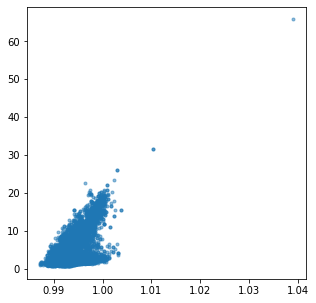

In [ ]:
# Cell for L2 Q4 A
feat1= 'density'
feat2= 'residual sugar'
x = df[feat1]
y = df[feat2]
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x,y, ls='', marker='.', alpha=0.5)

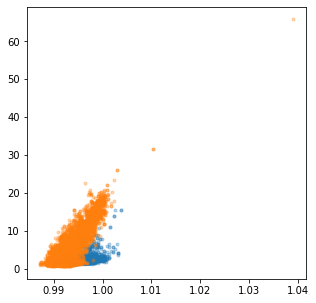

In [ ]:
# Cell for L2 Q4 B
feat1= 'density'
feat2= 'residual sugar'
x1 = df.loc[df['type'] == 'red'][feat1]
y1 = df.loc[df['type'] == 'red'][feat2]
x2 = df.loc[~(df['type'] == 'red')][feat1]
y2 = df.loc[~(df['type'] == 'red')][feat2]
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x1,y1, ls='', marker='.', alpha=0.3)
ax.plot(x2,y2, ls='', marker='.', alpha=0.3)

Text(0, 0.5, 'residual sugar')

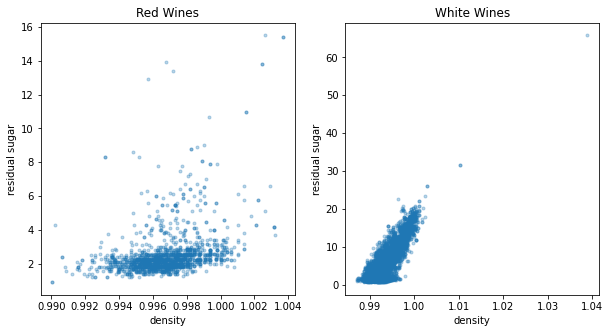

In [ ]:
# Cell for L2 Q4 C
feat1= 'density'
feat2= 'residual sugar'
x1 = df.loc[df['type'] == 'red'][feat1]
y1 = df.loc[df['type'] == 'red'][feat2]
x2 = df.loc[~(df['type'] == 'red')][feat1]
y2 = df.loc[~(df['type'] == 'red')][feat2]
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x1,y1, ls='', marker='.', alpha=0.3)
ax[1].plot(x2,y2, ls='', marker='.', alpha=0.3)
ax[0].set_title('Red Wines')
ax[1].set_title('White Wines')
ax[0].set_xlabel(feat1)
ax[1].set_xlabel(feat1)
ax[0].set_ylabel(feat2)
ax[1].set_ylabel(feat2)

(0.6, 65.8)

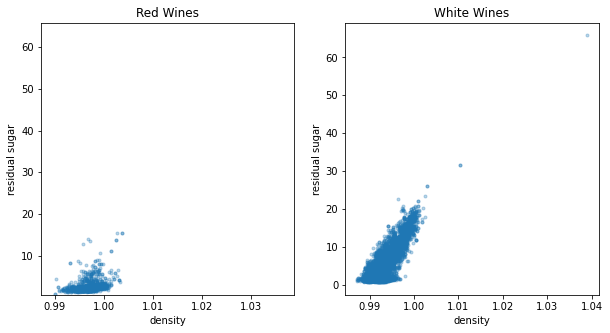

In [ ]:
# Cell for L2 Q4 C
feat1= 'density'
feat2= 'residual sugar'
x1 = df.loc[df['type'] == 'red'][feat1]
y1 = df.loc[df['type'] == 'red'][feat2]
x2 = df.loc[~(df['type'] == 'red')][feat1]
y2 = df.loc[~(df['type'] == 'red')][feat2]
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x1,y1, ls='', marker='.', alpha=0.3)
ax[1].plot(x2,y2, ls='', marker='.', alpha=0.3)
ax[0].set_title('Red Wines')
ax[1].set_title('White Wines')
ax[0].set_xlabel(feat1)
ax[1].set_xlabel(feat1)
ax[0].set_ylabel(feat2)
ax[1].set_ylabel(feat2)
ax[0].set_xlim(min(x2),max(x2))
ax[0].set_ylim(min(y2),max(y2))